In [5]:
#importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [6]:
#loading the dataset
dataset_path = 'sample_submission.csv'  # loading the dataset
df = pd.read_csv(dataset_path)

In [24]:
#Extracting features (X) and target variable (y)
X = df[['Id']]
y = df['SalePrice']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Initialize the linear regression model
model = LinearRegression()

In [27]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [29]:
# Flatten the 1D arrays
y_train_flat = y_train.values.flatten()
y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

In [30]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 239521036.513574
R^2 Score: 0.008827921820605322


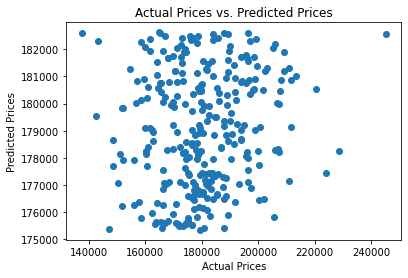

In [31]:
# Plot the predicted vs. actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

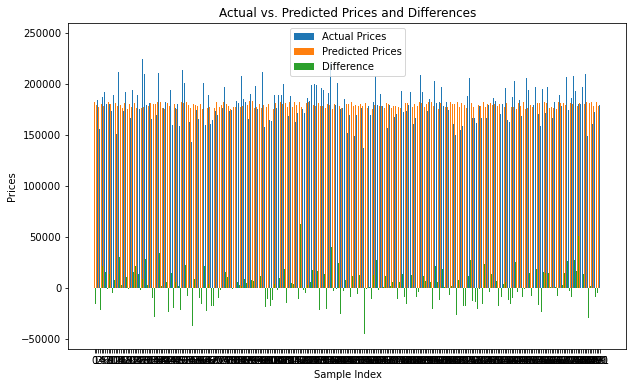

In [33]:
# Bar chart for actual prices, predicted prices, and their differences
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(y_test_flat))

bar1 = ax.bar(index, y_test_flat, bar_width, label='Actual Prices')
bar2 = ax.bar([i + bar_width for i in index], y_pred_flat, bar_width, label='Predicted Prices')
bar3 = ax.bar([i + 2 * bar_width for i in index], y_test_flat - y_pred_flat, bar_width, label='Difference')

ax.set_xlabel('Sample Index')
ax.set_ylabel('Prices')
ax.set_title('Actual vs. Predicted Prices and Differences')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(index)
ax.legend()

plt.show()